Filmes: 
    movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  genre_0  genre_1  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0        0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0        1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0        0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0        1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0        0   

   genre_2  genre_3  genre_4  ...  genre_9  genre_10  genre_11  genre_12  \
0        0        1        1  ...        0         0         0    

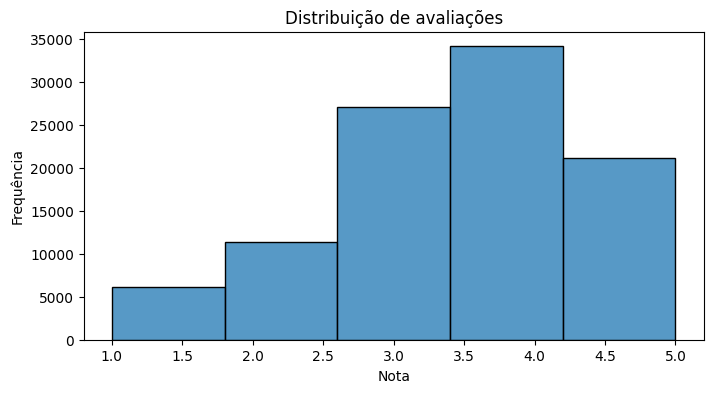

In [12]:
import pandas as pd

# Caminhos 

movies_path = "../data/raw/u.item"
ratings_path = "../data/raw/u.data"
users_path = "../data/raw/u.user"

# definindo colunas
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + [f'genre_{i}' for i in range(19)]
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

# leitura arquivos
movies = pd.read_csv(movies_path, sep='|', encoding='latin-1', names=movie_cols)
ratings = pd.read_csv(ratings_path, sep='\t', names=rating_cols)
users = pd.read_csv(users_path, sep='|', names=user_cols)

# Mostrando primeiras linhas
print("Filmes: \n", movies.head())
print("\n Avaliações: \n", ratings.head())
print("\n Usuários: \n", users.head())

#Verificando tamanhos
print("\nShapes: ")
print(f"Filmes: {movies.shape}, Avaliações: {ratings.shape}, Usuários: {users.shape}")


# Juntando Tabelas
user_ratings = ratings.merge(users, on='user_id').merge(movies, on='movie_id')

#exemplo de view
print("-------------------------")
print("User Ratings: \n\n", user_ratings.head())


# Verificação basica

# nenhum valor nulo
# user_ratings.isnull().sum()

# Qntd de usuários e filmes unicos
print(f"Usuários únicos: {user_ratings['user_id'].nunique()}\nFilmes únicos: {user_ratings['movie_id'].nunique()}")


# Explroação de Padrões
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(user_ratings['rating'], bins=5, kde=False)
plt.title("Distribuição de avaliações")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# Insight: Isso ajuda a entender como os usuários avaliam